In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.8HEKYM_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


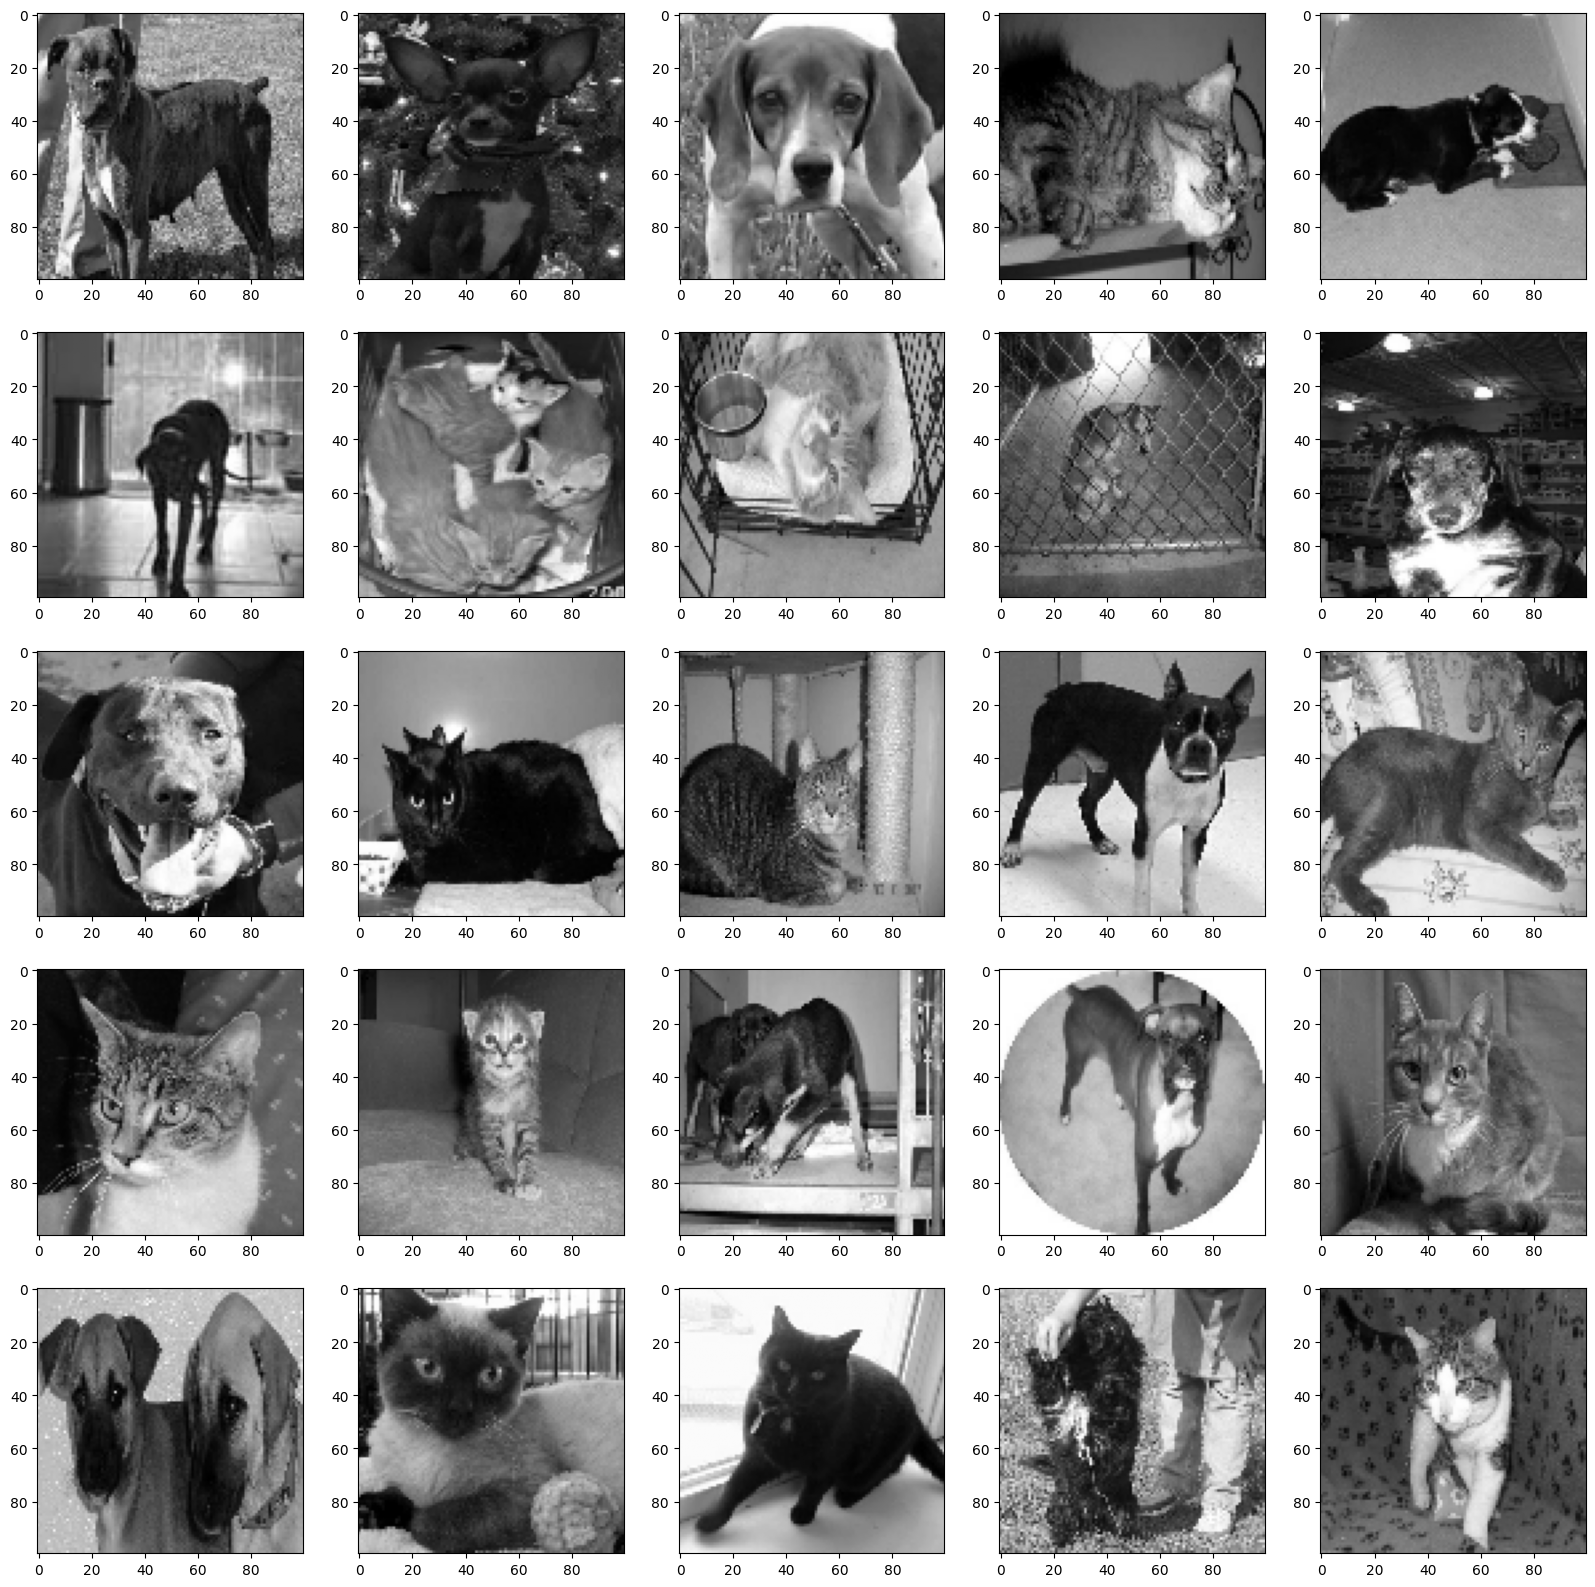

In [3]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(20,20))
TAMANO_IMG = 100
for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
    imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    plt.subplot(5,5,i+1)
    plt.imshow(imagen, cmap='gray')

In [4]:
datos_entrenamiento = []

In [5]:
for i,(imagen, etiqueta) in enumerate(datos['train'].take(25)):
    imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
    datos_entrenamiento.append([imagen, etiqueta])

In [6]:
datos_entrenamiento [0]

[array([[[249],
         [190],
         [105],
         ...,
         [189],
         [196],
         [143]],
 
        [[232],
         [127],
         [ 88],
         ...,
         [187],
         [180],
         [186]],
 
        [[171],
         [ 87],
         [ 83],
         ...,
         [129],
         [158],
         [166]],
 
        ...,
 
        [[113],
         [173],
         [162],
         ...,
         [143],
         [156],
         [119]],
 
        [[140],
         [152],
         [171],
         ...,
         [ 98],
         [155],
         [154]],
 
        [[ 91],
         [109],
         [167],
         ...,
         [ 46],
         [ 51],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [7]:
#DIVIDIR EN X Y LA IMAGEN Y ETIQUETA (PERRO Y GATO)
X=[]
y=[]

for imagen, etiqueta in datos_entrenamiento:
    X.append(imagen)
    y.append(etiqueta)

In [8]:
import numpy as np
X = np.array(X).astype(float)/255
#DIVIDIR LOS DATOS COMO FLOTANTE ENTRE 255

In [9]:
X[0]

array([[[0.97647059],
        [0.74509804],
        [0.41176471],
        ...,
        [0.74117647],
        [0.76862745],
        [0.56078431]],

       [[0.90980392],
        [0.49803922],
        [0.34509804],
        ...,
        [0.73333333],
        [0.70588235],
        [0.72941176]],

       [[0.67058824],
        [0.34117647],
        [0.3254902 ],
        ...,
        [0.50588235],
        [0.61960784],
        [0.65098039]],

       ...,

       [[0.44313725],
        [0.67843137],
        [0.63529412],
        ...,
        [0.56078431],
        [0.61176471],
        [0.46666667]],

       [[0.54901961],
        [0.59607843],
        [0.67058824],
        ...,
        [0.38431373],
        [0.60784314],
        [0.60392157]],

       [[0.35686275],
        [0.42745098],
        [0.65490196],
        ...,
        [0.18039216],
        [0.2       ],
        [0.18431373]]])

In [10]:
y

[<tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64

In [11]:
y=np.array(y)

In [12]:
modelo=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
modelo.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
modelo.fit(X, y, batch_size=32, validation_split=0.15, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4762 - loss: 0.6955 - val_accuracy: 0.2500 - val_loss: 1.1255
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.5714 - loss: 0.7357 - val_accuracy: 0.2500 - val_loss: 0.7894
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.5714 - loss: 0.6539 - val_accuracy: 0.2500 - val_loss: 0.7213
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6190 - loss: 0.6527 - val_accuracy: 0.2500 - val_loss: 0.7538
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.5714 - loss: 0.6306 - val_accuracy: 0.2500 - val_loss: 0.8643
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.5714 - loss: 0.6124 - val_accuracy: 0.2500 - val_loss: 0.8689
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5714 - loss: 0.5818 - val_accuracy: 0.2500 - val_loss: 0.7981
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.6190 - loss: 0.5376 - val_accuracy: 0.2500 - val_loss: 0.